In [1]:
import pandas as pd
import os
import random

In [2]:
base_path = "./feature_image"
contestants = os.listdir(f"{base_path}")
contestants = [c for c in contestants if c.endswith('csv')]
add_data_path="./data_img_info_csv"

# Xử lý NA

In [3]:
for c in contestants:
    temp = pd.read_csv(f"{base_path}/{c}")
    temp = temp.dropna()
#     temp =temp .drop('Unnamed: 0',axis=1)
    temp['level'] = temp['level'].astype(float).astype(int)
    temp=temp.loc[:,~temp.columns.str.contains('Unnamed',regex=True)]
    os.remove(f"{base_path}/{c}")
    temp.to_csv(f"{base_path}/{c}", index=False)
temp

,anger,disgust,fear,happiness,sadness,surprise,neutral,AU01,AU02,AU04,...,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43,img_name,level
0,0.017239,0.015235,0.176891,0.341711,0.028478,0.004233,0.416213,0.601805,0.537354,0.211898,...,0.324528,1.0,0.297471,0.045166,0.989468,0.470132,0.182868,0.682754,./image/P14/P14_1659070888638.png,0
1,0.030872,0.009780,0.125229,0.264078,0.030885,0.006509,0.532647,0.546128,0.187422,0.341496,...,0.377041,0.0,0.628678,0.065833,0.990498,0.501712,0.313960,0.630475,./image/P14/P14_1659085749056.png,0
2,0.005416,0.013230,0.219520,0.173419,0.070296,0.011200,0.506919,0.464037,0.232327,0.461129,...,0.459882,1.0,0.479015,0.245514,0.990322,0.193106,0.368260,0.850828,./image/P14/P14_1659684037468.png,0
3,0.007522,0.009384,0.454181,0.181890,0.040242,0.030942,0.275839,0.508276,0.269019,0.458627,...,0.637235,1.0,0.819013,0.641877,0.937381,0.077706,0.319819,0.190604,./image/P14/P14_1659265517964.png,0
4,0.024187,0.010670,0.089908,0.288213,0.039413,0.003910,0.543699,0.591552,0.371097,0.553130,...,0.369656,1.0,0.342236,0.050512,0.979466,0.422746,0.056997,0.569246,./image/P14/P14_1658984695198.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.040957,0.010263,0.068325,0.171963,0.032893,0.004782,0.670815,0.792422,0.662862,0.146113,...,0.280971,1.0,0.254034,0.063396,0.983158,0.445436,0.105169,0.638492,./image/P14/P14_1659279866187.png,0
1916,0.009720,0.003048,0.145236,0.122815,0.060651,0.007962,0.650567,0.637243,0.314642,0.136442,...,0.389752,0.0,0.760976,0.270353,0.974202,0.458458,0.115001,0.273430,./image/P14/P14_1659456638127.png,0
1917,0.029612,0.012102,0.202055,0.284258,0.032657,0.015629,0.423687,0.624641,0.367987,0.292672,...,0.322887,1.0,0.645095,0.068958,0.900835,0.509297,0.077086,0.406576,./image/P14/P14_1659456537639.png,0
1918,0.013094,0.010975,0.097032,0.256737,0.053264,0.009323,0.559576,0.672477,0.596553,0.303114,...,0.302141,1.0,0.547257,0.201306,0.998685,0.470552,0.115043,0.567455,./image/P14/P14_1659510069849.png,0


In [4]:
person=[c.split('_')[0] for c in contestants]
person=list(set(person))
for per in person:
    if len(contestants)<30:
        break
    contestant_split=[i for i in contestants if per in i]
    merge=[]
    for i in contestant_split:
        temp = pd.read_csv(f"{base_path}/{i}")
        os.remove(f"{base_path}/{i}")
        merge.append(temp)
    merge_df=pd.concat(merge,axis=0)
    merge_df=merge_df.reset_index(drop=True)
    merge_df.to_csv(f"{base_path}/{per}.csv", index=False)
#     break

In [5]:
depression = dict()
contestants = os.listdir(f"{base_path}")
contestants = [c for c in contestants if c.endswith('csv')]
for c in contestants:
    if not c.endswith('csv'):
        continue
    if c =='P27.csv':
        continue
    temp = pd.read_csv(f"{base_path}/{c}")
    depression[c] = list(temp["level"].unique())

In [6]:
depression.items()

dict_items([('P19.csv', [1]), ('P31.csv', [0]), ('P25.csv', [0]), ('P24.csv', [1]), ('P30.csv', [1]), ('P18.csv', [1]), ('P33.csv', [0]), ('P23.csv', [0]), ('P36.csv', [0]), ('P34.csv', [0]), ('P20.csv', [0]), ('P08.csv', [0]), ('P21.csv', [1, 0]), ('P35.csv', [0]), ('P38.csv', [0]), ('P10.csv', [0, 1]), ('P13.csv', [0]), ('P12.csv', [1]), ('P16.csv', [0]), ('P17.csv', [1]), ('P15.csv', [1, 0]), ('P29.csv', [0]), ('P28.csv', [0]), ('P14.csv', [0])])

In [7]:
([key for key, value in depression.items() if value[0] == 0 and len(value) == 1])

['P31.csv',
 'P25.csv',
 'P33.csv',
 'P23.csv',
 'P36.csv',
 'P34.csv',
 'P20.csv',
 'P08.csv',
 'P35.csv',
 'P38.csv',
 'P13.csv',
 'P16.csv',
 'P29.csv',
 'P28.csv',
 'P14.csv']

In [8]:
# (depression)
# len(os.listdir(base_path))

# Chia train test

In [9]:
contestants = os.listdir(f"{base_path}")
print(contestants)
contestants = [c for c in contestants if c.endswith('csv')]
print(contestants)

['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', '.DS_Store', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']


In [10]:
random.seed(int.from_bytes(os.urandom(4), 'big'))
only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
both = [key for key, value in depression.items() if len(value) == 2]
# both.pop('P17.csv')
contestants=[c for c in contestants if c.endswith('csv')]
testPerson = [int(random.choice(only1).split('.')[0].split('P')[1])] + [int(random.choice(only0).split('.')[0].split('P')[1])]
allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
trainPerson = [a for a in allPerson if a not in testPerson]
# testPerson = [8]
# trainPerson = [21]


In [11]:
all_data=[]
for i in contestants:
    all_data.append(pd.read_csv(f"{base_path}/{i}").dropna())
all_df_data=pd.concat(all_data,axis=0)
all_df_data

,anger,disgust,fear,happiness,sadness,surprise,neutral,AU01,AU02,AU04,...,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43,img_name,level
0,0.013205,0.005202,0.374994,0.102363,0.049852,0.018875,0.435509,0.713220,0.510258,0.059922,...,0.466907,0.0,0.535557,0.490966,0.935579,0.121045,0.333033,0.121158,./image/P19/P19_1659487998833.png,1
1,0.011412,0.002000,0.171314,0.144660,0.163057,0.040847,0.466711,0.674876,0.313608,0.280145,...,0.418187,1.0,0.635475,0.157254,0.975519,0.468108,0.318228,0.165630,./image/P19/P19_1659020214976.png,1
2,0.014839,0.025150,0.251343,0.275955,0.048502,0.013539,0.370671,0.538187,0.284743,0.386870,...,0.407967,1.0,0.589100,0.679930,0.900595,0.114604,0.304304,0.082065,./image/P19/P19_1659075503842.png,1
3,0.011381,0.001744,0.194381,0.039042,0.111313,0.022853,0.619285,0.711540,0.427390,0.073868,...,0.371300,0.0,0.498661,0.593501,0.636757,0.147229,0.222992,0.079755,./image/P19/P19_1659021205080.png,1
4,0.005302,0.002227,0.185530,0.082221,0.074113,0.005386,0.645222,0.608201,0.277692,0.214240,...,0.430974,1.0,0.397525,0.039843,0.996547,0.306116,0.034934,0.117396,./image/P19/P19_1659355704725.png,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.040957,0.010263,0.068325,0.171963,0.032893,0.004782,0.670815,0.792422,0.662862,0.146113,...,0.280971,1.0,0.254034,0.063396,0.983158,0.445436,0.105169,0.638492,./image/P14/P14_1659279866187.png,0
1916,0.009720,0.003048,0.145236,0.122815,0.060651,0.007962,0.650567,0.637243,0.314642,0.136442,...,0.389752,0.0,0.760976,0.270353,0.974202,0.458458,0.115001,0.273430,./image/P14/P14_1659456638127.png,0
1917,0.029612,0.012102,0.202055,0.284258,0.032657,0.015629,0.423687,0.624641,0.367987,0.292672,...,0.322887,1.0,0.645095,0.068958,0.900835,0.509297,0.077086,0.406576,./image/P14/P14_1659456537639.png,0
1918,0.013094,0.010975,0.097032,0.256737,0.053264,0.009323,0.559576,0.672477,0.596553,0.303114,...,0.302141,1.0,0.547257,0.201306,0.998685,0.470552,0.115043,0.567455,./image/P14/P14_1659510069849.png,0


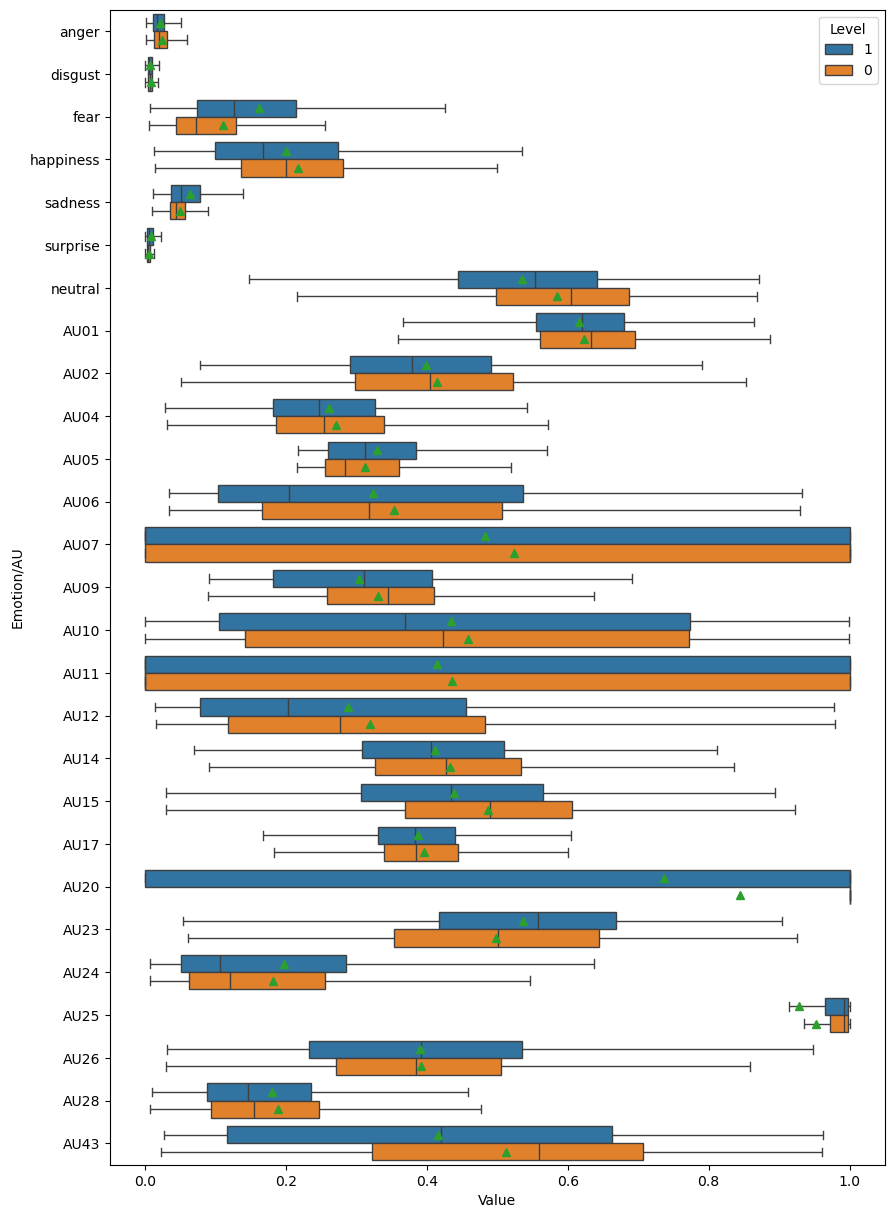

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
emotion_features = all_df_data.columns[:-2]#7
df_melted = pd.melt(all_df_data,
                    id_vars=['level'],           # keep the level column as identifier
                    value_vars=emotion_features, # the emotion feature columns to melt
                    var_name='emotion',          # new column for emotion names
                    value_name='value')          # new column for the corresponding values

# If your level values are continuous but you want to treat them as categories, you can convert them to strings:
df_melted['level'] = df_melted['level'].astype(str)

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 15))
sns.boxplot(y='emotion', x='value', hue='level', data=df_melted,showmeans=True,showfliers=False)
# plt.title("Emotion Feature Distributions by Level")
plt.xlabel("Value")
plt.ylabel("Emotion/AU") 
plt.legend(title="Level")
# plt.show()
# plt.draw()
plt.savefig('./image_paper/all_volunteer.png')

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsTransformer
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
f1_score,precision_score,recall_score,roc_auc_score
from imblearn.over_sampling import SMOTE

k=1

f1=[]
accuracy=[]
precision=[]
recall=[]
roc_auc=[]
model=[]

testPersons=[['P31.csv','P19.csv'],
            ['P20.csv','P24.csv'],
            ['P13.csv','P30.csv'],#
            ['P31.csv','P18.csv'],
            ['P08.csv','P24.csv']#
#             both
            ]

sm=SMOTE()
for i in range(len(testPersons)):
    train_list=[]
    test_list=[]
    # Scramble
    random.seed(int.from_bytes(os.urandom(4), 'big'))
    only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
    only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
    both = [key for key, value in depression.items() if len(value) == 2]
    # testPerson = ['08'] + ['24']#['16','08'] + ['24','30']
#     testPerson = [random.choice(only0)] \
#     + [random.choice(only1)]
#     print(testPerson)
#     # testPerson = [13,17]
#     allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
#     trainPerson = [a for a in allPerson if str(a) not in testPerson]
#     testPerson = random.sample(only0,k) \
#     + random.sample(only1,k)
    testPerson=testPersons[i]
    # testPerson = [13,17]
    allPerson = contestants
    trainPerson = [a for a in allPerson if str(a) not in testPerson]

#     # Merge train data and shuffle
#     train_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in trainPerson]
#     merged_train = pd.concat(train_list, ignore_index=True)
#     shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

#     test_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in testPerson]
#     merged_test = pd.concat(test_list, ignore_index=True)
#     shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_test = shuffled_test.drop([ 'img_name'], axis = 1)
    for num in trainPerson:
        train = pd.read_csv(f'{base_path}/{num}')
        train=train.set_index('img_name')
        duplicate_rows = train.index.duplicated()
        train=train.loc[~duplicate_rows,:]
        add_data=pd.read_csv(f'{add_data_path}/{num}')
        add_data=add_data.drop(['Unnamed: 0','level'],axis=1)
        add_data=add_data.set_index('img_name')
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        train_=pd.concat([train,add_data],axis=1)
        train_=train_.reset_index()
        train_=train_.dropna()
        train_=train_.drop(['timestamp','ID'],axis=1)
        train_list.append(train)#train_ for addition data
    
    merged_train = pd.concat(train_list, ignore_index=True)
    shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
    try:
        shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)
    except:pass   

    for num in testPerson:
        test = pd.read_csv(f'{base_path}/{num}')
        test=test.set_index('img_name')
        duplicate_rows = test.index.duplicated()
        test=test.loc[~duplicate_rows,:]
        add_data=pd.read_csv(f'{add_data_path}/{num}')
        add_data=add_data.drop(['Unnamed: 0','level'],axis=1)
        add_data=add_data.set_index('img_name')
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        test_=pd.concat([test,add_data],axis=1)
        test_=test_.reset_index()
        test_=test_.dropna()
        test_=test_.drop(['timestamp','ID'],axis=1)
        test_list.append(test)#test_ for addition data
    merged_test = pd.concat(test_list, ignore_index=True)
    shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
    try:
#         shuffled_test=shuffled_test.reset_index(drop=False)
#         shuffled_test['ts']=shuffled_test['img_name'].apply(lambda x :int(int(x.split('_')[-1][:-4])/1000))
        shuffled_test = shuffled_test.drop(['img_name'], axis = 1)
        
    except Exception as e:print(e)
#     add_train_from_test,shuffled_test=shuffled_test[shuffled_test['ts']<shuffled_test['ts'].median()],shuffled_test[shuffled_test['ts']>shuffled_test['ts'].median()]
# #     add_train_from_test,shuffled_test=train_test_split(shuffled_test,test_size=0.5)
#     add_train_from_test,shuffled_test=add_train_from_test.drop('ts',axis=1),shuffled_test.drop('ts',axis=1)
#     shuffled_train=pd.concat([add_train_from_test,shuffled_train],axis=0)


    X_train, y_train = shuffled_train.drop('level', axis = 1), shuffled_train['level']

    X_test, y_test = shuffled_test.drop('level', axis = 1), shuffled_test['level']
    y_train =y_train.astype('category')
    y_test =y_test.astype('category')
    X_train, y_train = sm.fit_resample(X_train, y_train)
    X_train=pd.DataFrame(X_train,columns=X_train.columns)
    # y_train=pd.DataFrame(y_train,columns=y_test.columns)
    # Print train test contestants
    print("Train: ", trainPerson)
    print("Test: ", testPerson)
    

    # Logistic Regression
    # log_reg = LogisticRegression(max_iter=10000)
    # log_reg.fit(X_train, y_train)
    # log_reg_pred = log_reg.predict(X_test)
    # log_reg_acc = classification_report(y_test, log_reg_pred)
    # print(f"Logistic Regression Accuracy:", log_reg_acc)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=100)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_rp = classification_report(y_test, knn_pred)
    accuracy.append(accuracy_score(y_test, knn_pred))
    f1.append(f1_score(y_test, knn_pred,average='macro'))
    precision.append(precision_score(y_test, knn_pred,average='macro'))
    recall.append(recall_score(y_test, knn_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, knn_pred))
    model.append('KNN')
    print('knn ',i)
    print(knn_rp)
    
    
#     # Support Vector Machine (SVM)
    svm =  XGBClassifier(n_estimators=100)#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_rp = classification_report(y_test, svm_pred)
    accuracy.append(accuracy_score(y_test, svm_pred))
    f1.append(f1_score(y_test, svm_pred,average='macro'))
    precision.append(precision_score(y_test, svm_pred,average='macro'))
    recall.append(recall_score(y_test, svm_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, svm_pred))
    model.append('XGB')
    print('XGB ',i)
    print(svm_rp)
    
    svm =  LogisticRegression()#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_rp = classification_report(y_test, svm_pred)
    accuracy.append(accuracy_score(y_test, svm_pred))
    f1.append(f1_score(y_test, svm_pred,average='macro'))
    precision.append(precision_score(y_test, svm_pred,average='macro'))
    recall.append(recall_score(y_test, svm_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, svm_pred))
    model.append('LR')
    print('LR ',i)
    print(svm_rp)

#     # Random Forest Classifier
#     rf = RandomForestClassifier(n_estimators=1000)
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc = classification_report(y_test, rf_pred)
#     print('rf ',i)
#     print(rf_acc)

#     xgb = XGBClassifier(n_estimators=1000)
#     xgb.fit(X_train, y_train)
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc = classification_report(y_test, xgb_pred)
#     print('xgb ',i)
#     print(xgb_acc)

#     # Neural Network (MLP Classifier)
#     mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)
#     mlp.fit(X_train, y_train)
#     mlp_pred = mlp.predict(X_test)
#     mlp_acc = classification_report(y_test, mlp_pred)
#     print('MLP ',i)
#     print(mlp_acc)


"['img_name'] not found in axis"
Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
knn  0
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       678
           1       0.88      0.76      0.82      1039

    accuracy                           0.79      1717
   macro avg       0.79      0.80      0.79      1717
weighted avg       0.81      0.79      0.80      1717

XGB  0
              precision    recall  f1-score   support

           0       0.47      0.84      0.60       678
           1       0.79      0.39      0.52      1039

    accuracy                           0.57      1717
   macro avg       0.63      0.61      0.56      1717
weighted avg       0.66      0.57      0.55      1717



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  0
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       678
           1       0.92      0.71      0.80      1039

    accuracy                           0.79      1717
   macro avg       0.80      0.81      0.79      1717
weighted avg       0.82      0.79      0.79      1717

"['img_name'] not found in axis"
Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1
              precision    recall  f1-score   support

           0       0.23      0.54      0.32       536
           1       0.92      0.75      0.82      3880

    accuracy                           0.72      4416
   macro avg       0.57      0.64      0.57      4416
weighted avg       0.84      0.72      0.76      4416

XGB  1
 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  1
              precision    recall  f1-score   support

           0       0.12      0.55      0.20       536
           1       0.88      0.45      0.60      3880

    accuracy                           0.46      4416
   macro avg       0.50      0.50      0.40      4416
weighted avg       0.79      0.46      0.55      4416

"['img_name'] not found in axis"
Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2
              precision    recall  f1-score   support

           0       0.36      0.78      0.49      1112
           1       0.86      0.50      0.63      3042

    accuracy                           0.57      4154
   macro avg       0.61      0.64      0.56      4154
weighted avg       0.73      0.57      0.59      4154

XGB  2
 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR  3
              precision    recall  f1-score   support

           0       0.47      0.92      0.63       678
           1       0.92      0.47      0.62      1312

    accuracy                           0.62      1990
   macro avg       0.70      0.70      0.62      1990
weighted avg       0.77      0.62      0.62      1990

"['img_name'] not found in axis"
Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4
              precision    recall  f1-score   support

           0       0.04      0.25      0.07       181
           1       0.95      0.74      0.83      3880

    accuracy                           0.72      4061
   macro avg       0.50      0.50      0.45      4061
weighted avg       0.91      0.72      0.80      4061

XGB  4
 

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X_train,y_train)
features_score1 = pd.DataFrame(fit.pvalues_)
features1 = pd.DataFrame(X_train.columns)
feature_score1 = pd.concat([features1,features_score1],axis=1)
# Assigning column names
feature_score1.columns = ["Input_Features","p_values"]
feature_score1=feature_score1.sort_values('p_values', ascending=True)
print(feature_score1.to_string())

   Input_Features       p_values
2            fear   0.000000e+00
6         neutral   0.000000e+00
5        surprise  9.950132e-242
19           AU17  4.062776e-188
11           AU06  2.458384e-123
7            AU01  4.525344e-117
14           AU10  1.826099e-105
24           AU26   5.615461e-88
22           AU24   2.014201e-66
4         sadness   3.102235e-46
13           AU09   1.226805e-43
16           AU12   1.570522e-43
3       happiness   2.206175e-34
9            AU04   5.846971e-30
18           AU15   2.208177e-28
1         disgust   3.885659e-28
0           anger   1.686125e-23
8            AU02   1.010173e-19
21           AU23   2.452284e-18
12           AU07   8.523106e-18
17           AU14   2.802793e-11
25           AU28   8.219730e-11
15           AU11   2.109093e-08
23           AU25   3.323067e-04
10           AU05   3.829205e-04
26           AU43   1.278832e-02
20           AU20   5.691520e-01


In [15]:
X_train

,anger,disgust,fear,happiness,sadness,surprise,neutral,AU01,AU02,AU04,...,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.028010,0.005050,0.112035,0.206918,0.039830,0.003359,0.604798,0.441470,0.244222,0.247741,...,0.287023,0.754294,0.373957,1.0,0.409330,0.166060,0.988761,0.451363,0.073265,0.648741
1,0.009691,0.001625,0.030305,0.141141,0.071189,0.002137,0.743910,0.731117,0.309397,0.391120,...,0.262104,0.439468,0.355174,1.0,0.606937,0.048256,0.998899,0.476950,0.135747,0.166353
2,0.016050,0.002721,0.104557,0.096812,0.163395,0.019642,0.596823,0.712513,0.417560,0.181214,...,0.371809,0.580586,0.481117,1.0,0.531415,0.172991,0.996616,0.186925,0.110731,0.100842
3,0.034160,0.031738,0.046257,0.452628,0.027528,0.004036,0.403654,0.711828,0.534157,0.138964,...,0.687615,0.647505,0.292321,1.0,0.317085,0.036716,0.996456,0.603464,0.094943,0.554039
4,0.008282,0.003689,0.145031,0.140706,0.034648,0.004140,0.663505,0.522221,0.258730,0.284942,...,0.363836,0.420816,0.332058,0.0,0.733109,0.254347,0.895926,0.153599,0.156247,0.125745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45737,0.023643,0.008191,0.283459,0.379380,0.042853,0.005001,0.257473,0.694445,0.352160,0.377829,...,0.363305,0.532680,0.373285,1.0,0.522888,0.022997,0.998845,0.671663,0.171927,0.771112
45738,0.031062,0.012623,0.062723,0.348037,0.035925,0.004081,0.505549,0.639977,0.365755,0.395380,...,0.313843,0.784734,0.365937,1.0,0.426590,0.042443,0.997463,0.518530,0.107128,0.773185
45739,0.021099,0.003845,0.118872,0.150546,0.061558,0.005379,0.638700,0.672093,0.346136,0.225100,...,0.266576,0.662950,0.385453,1.0,0.652936,0.124123,0.993760,0.557556,0.124696,0.765431
45740,0.029466,0.005710,0.071045,0.121074,0.072296,0.005605,0.694804,0.564858,0.403990,0.136709,...,0.412467,0.411790,0.546545,1.0,0.364880,0.152323,0.995162,0.265072,0.146190,0.228723


In [16]:
# for num in trainPerson:
#     train = pd.read_csv(f'{base_path}/{num}')
#     train=train.set_index('img_name')
#     duplicate_rows = train.index.duplicated()
#     train=train.loc[~duplicate_rows,:]
#     add_data=train.copy()
#     add_data=add_data.shift(1)
#     add_data.columns=[i+'_prev' for i in add_data.columns]
#     train_=pd.concat([train,add_data],axis=1)
#     train_=train_.reset_index()
#     train_=train_.dropna()
# #     train_=train_.drop(['timestamp','ID'],axis=1)
#     break
# train_

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsTransformer
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
f1_score,precision_score,recall_score,roc_auc_score
from imblearn.over_sampling import SMOTE

k=1

# f1=[]
# accuracy=[]
# precision=[]
# recall=[]
# roc_auc=[]
# model=[]
# testPersons=[['P31.csv','P19.csv'],
#             ['P14.csv','P24.csv'],
#             ['P13.csv','P30.csv'],
#             ['P31.csv','P18.csv'],
#             ['P08.csv','P24.csv']]
sm=SMOTE()
j=True
for i in range(len(testPersons)):
    train_list=[]
    test_list=[]
    # Scramble
    random.seed(int.from_bytes(os.urandom(4), 'big'))
    only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
    only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
    both = [key for key, value in depression.items() if len(value) == 2]
    # testPerson = ['08'] + ['24']#['16','08'] + ['24','30']
#     testPerson = [str(random.choice(only0).split('.')[0].split('P')[1])] \
#     + [str(random.choice(only1).split('.')[0].split('P')[1])]
#     # testPerson = [13,17]
#     allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
#     trainPerson = [a for a in allPerson if str(a) not in testPerson]
#     testPerson = random.sample(only0,k) \
#     + random.sample(only1,k)
    testPerson=testPersons[i]
    # testPerson = [13,17]
    allPerson = contestants
    trainPerson = [a for a in allPerson if str(a) not in testPerson]

#     # Merge train data and shuffle
#     train_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in trainPerson]
#     merged_train = pd.concat(train_list, ignore_index=True)
#     shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

#     test_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in testPerson]
#     merged_test = pd.concat(test_list, ignore_index=True)
#     shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_test = shuffled_test.drop([ 'img_name'], axis = 1)
    for num in trainPerson:
        train = pd.read_csv(f'{base_path}/{num}')
        train=train.set_index('img_name')
        duplicate_rows = train.index.duplicated()
        train=train.loc[~duplicate_rows,:]
        train_addata=train.copy()
        train=train.drop('level',axis=1)
        add_data=train.copy()
        
        add_data=add_data.shift(1)
        add_data.columns=[i.split('_')[0]+'_time_lag' for i in train.columns]
        
#         add_data2=add_data.shift(2)
#         add_data2.columns=[i+'_prev2' for i in add_data.columns]

        add_vel=add_data.diff(1)
        add_vel.columns=[i+'_vel' for i in train.columns]
        
#         duplicate_rows = add_data.index.duplicated()
        train_=pd.concat([train_addata,add_data,add_vel],axis=1)
        train_=train_.reset_index()
        train_=train_.dropna()
#         train_=train_.drop(['timestamp','ID'],axis=1)
        train_list.append(train_)#train_ for addition data
    
    merged_train = pd.concat(train_list, ignore_index=True)
    shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)

    try:
        shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)
    except:pass   

    for num in testPerson:
        test = pd.read_csv(f'{base_path}/{num}')
        test=test.set_index('img_name')
        
        
        duplicate_rows = test.index.duplicated()
        test=test.loc[~duplicate_rows,:]
        test_add=test.copy()
        test=test.drop('level',axis=1)
        add_data=test.copy()
        
        add_data=add_data.shift(1)
        add_data.columns=[i.split('_')[0]+'_time_lag' for i in test.columns]

        add_vel=add_data.diff(1)
        add_vel.columns=[i+'_vel' for i in test.columns]
        
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        test_=pd.concat([test_add,add_data,add_vel],axis=1)
        test_=test_.reset_index()
        test_=test_.dropna()

        test_list.append(test_)#test_ for addition data
    merged_test = pd.concat(test_list, ignore_index=True)
    shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
    try:
#         shuffled_test=shuffled_test.reset_index(drop=False)
#         shuffled_test['ts']=shuffled_test['img_name'].apply(lambda x :int(int(x.split('_')[-1][:-4])/1000))
        shuffled_test = shuffled_test.drop(['img_name'], axis = 1)
        
    except Exception as e:print(e)
#     add_train_from_test,shuffled_test=shuffled_test[shuffled_test['ts']<shuffled_test['ts'].median()],shuffled_test[shuffled_test['ts']>shuffled_test['ts'].median()]
# #     add_train_from_test,shuffled_test=train_test_split(shuffled_test,test_size=0.5)
#     add_train_from_test,shuffled_test=add_train_from_test.drop('ts',axis=1),shuffled_test.drop('ts',axis=1)
#     shuffled_train=pd.concat([add_train_from_test,shuffled_train],axis=0)

    X_train, y_train = shuffled_train.drop('level', axis = 1), shuffled_train['level']

    X_test, y_test = shuffled_test.drop('level', axis = 1), shuffled_test['level']
    y_train =y_train.astype('category')
    y_test =y_test.astype('category')
    X_train, y_train = sm.fit_resample(X_train, y_train)
    X_train=pd.DataFrame(X_train,columns=X_train.columns)
    # y_train=pd.DataFrame(y_train,columns=y_test.columns)
    # Print train test contestants
    print("Train: ", trainPerson)
    print("Test: ", testPerson)
    if j:
        print(X_train.columns.T)
        j=False

    # Logistic Regression
    # log_reg = LogisticRegression(max_iter=10000)
    # log_reg.fit(X_train, y_train)
    # log_reg_pred = log_reg.predict(X_test)
    # log_reg_acc = classification_report(y_test, log_reg_pred)
    # print(f"Logistic Regression Accuracy:", log_reg_acc)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=100, leaf_size=70)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_rp = classification_report(y_test, knn_pred)
    accuracy.append(accuracy_score(y_test, knn_pred))
    f1.append(f1_score(y_test, knn_pred,average='macro'))
    precision.append(precision_score(y_test, knn_pred,average='macro'))
    recall.append(recall_score(y_test, knn_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, knn_pred))
    model.append('KNN_tlsd')
    print('knn ',i)
    print(knn_rp)
    
    
#     # Support Vector Machine (SVM)
    svm =  XGBClassifier(n_estimators=100)#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_rp = classification_report(y_test, svm_pred)
    accuracy.append(accuracy_score(y_test, svm_pred))
    f1.append(f1_score(y_test, svm_pred,average='macro'))
    precision.append(precision_score(y_test, svm_pred,average='macro'))
    recall.append(recall_score(y_test, svm_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, svm_pred))
    model.append('XGB_tlsd')
    print('XGB_ ',i)
    print(svm_rp)
    
        
    svm =  LogisticRegression()#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_rp = classification_report(y_test, svm_pred)
    accuracy.append(accuracy_score(y_test, svm_pred))
    f1.append(f1_score(y_test, svm_pred,average='macro'))
    precision.append(precision_score(y_test, svm_pred,average='macro'))
    recall.append(recall_score(y_test, svm_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, svm_pred))
    model.append('LR_tlsd')
    print('LR_ ',i)
    print(svm_rp)

#     # Random Forest Classifier
#     rf = RandomForestClassifier(n_estimators=1000)
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc = classification_report(y_test, rf_pred)
#     print('rf ',i)
#     print(rf_acc)

#     xgb = XGBClassifier(n_estimators=1000)
#     xgb.fit(X_train, y_train)
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc = classification_report(y_test, xgb_pred)
#     print('xgb ',i)
#     print(xgb_acc)

#     # Neural Network (MLP Classifier)
#     mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)
#     mlp.fit(X_train, y_train)
#     mlp_pred = mlp.predict(X_test)
#     mlp_acc = classification_report(y_test, mlp_pred)
#     print('MLP ',i)
#     print(mlp_acc)


Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43', 'anger_time_lag', 'disgust_time_lag',
       'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag',
       'surprise_time_lag', 'neutral_time_lag', 'AU01_time_lag',
       'AU02_time_lag', 'AU04_time_lag', 'AU05_time_lag', 'AU06_time_lag',
       'AU07_time_lag', 'AU09_time_lag', 'AU10_time_lag', 'AU11_time_lag',
       'AU12_time_lag', 'AU14_time_lag', 'AU15_time_lag', 'AU17_time_lag',
       'AU20_time_lag', 'AU23_time_lag', 'AU24_time

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       676
           1       0.98      0.77      0.86      1037

    accuracy                           0.85      1713
   macro avg       0.86      0.87      0.85      1713
weighted avg       0.88      0.85      0.85      1713

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1
              precision    recall  f1-score   support

           0       0.17      0.34      0.23       534
           1       0.90      0.77      0.83      3878

    accuracy                           0.72      4412
   macro avg       0.53      0.56      0.53      4412
weighted avg       0.81      0.72      0.76      4412

XGB_  1
              precision    recal

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1
              precision    recall  f1-score   support

           0       0.12      0.56      0.19       534
           1       0.87      0.41      0.56      3878

    accuracy                           0.43      4412
   macro avg       0.49      0.49      0.37      4412
weighted avg       0.78      0.43      0.51      4412

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2
              precision    recall  f1-score   support

           0       0.32      0.78      0.45      1110
           1       0.83      0.39      0.53      3040

    accuracy                           0.49      4150
   macro avg       0.57      0.58      0.49      4150
weighted avg       0.69      0.49      0.51      4150

XGB_  2
              precision    recal

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2
              precision    recall  f1-score   support

           0       0.30      0.86      0.45      1110
           1       0.84      0.29      0.43      3040

    accuracy                           0.44      4150
   macro avg       0.57      0.57      0.44      4150
weighted avg       0.70      0.44      0.43      4150

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3
              precision    recall  f1-score   support

           0       0.49      0.90      0.64       676
           1       0.91      0.52      0.67      1310

    accuracy                           0.65      1986
   macro avg       0.70      0.71      0.65      1986
weighted avg       0.77      0.65      0.66      1986

XGB_  3
              precision    recal

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3
              precision    recall  f1-score   support

           0       0.58      0.98      0.73       676
           1       0.99      0.63      0.77      1310

    accuracy                           0.75      1986
   macro avg       0.78      0.81      0.75      1986
weighted avg       0.85      0.75      0.75      1986

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4
              precision    recall  f1-score   support

           0       0.07      0.36      0.12       179
           1       0.96      0.78      0.86      3878

    accuracy                           0.76      4057
   macro avg       0.52      0.57      0.49      4057
weighted avg       0.92      0.76      0.83      4057

XGB_  4
              precision    recal

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsTransformer
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
f1_score,precision_score,recall_score,roc_auc_score
from imblearn.over_sampling import SMOTE

k=1

# f1=[]
# accuracy=[]
# precision=[]
# recall=[]
# roc_auc=[]
# model=[]
# testPersons=[['P31.csv','P19.csv'],
#             ['P14.csv','P24.csv'],
#             ['P13.csv','P30.csv'],
#             ['P31.csv','P18.csv'],
#             ['P08.csv','P24.csv']]
sm=SMOTE()
j=True
for i in range(len(testPersons)):
    train_list=[]
    test_list=[]
    # Scramble
    random.seed(int.from_bytes(os.urandom(4), 'big'))
    only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
    only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
    both = [key for key, value in depression.items() if len(value) == 2]
    # testPerson = ['08'] + ['24']#['16','08'] + ['24','30']
#     testPerson = [str(random.choice(only0).split('.')[0].split('P')[1])] \
#     + [str(random.choice(only1).split('.')[0].split('P')[1])]
#     # testPerson = [13,17]
#     allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
#     trainPerson = [a for a in allPerson if str(a) not in testPerson]
#     testPerson = random.sample(only0,k) \
#     + random.sample(only1,k)
    testPerson=testPersons[i]
    # testPerson = [13,17]
    allPerson = contestants
    trainPerson = [a for a in allPerson if str(a) not in testPerson]

#     # Merge train data and shuffle
#     train_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in trainPerson]
#     merged_train = pd.concat(train_list, ignore_index=True)
#     shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

#     test_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in testPerson]
#     merged_test = pd.concat(test_list, ignore_index=True)
#     shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_test = shuffled_test.drop([ 'img_name'], axis = 1)
    for num in trainPerson:
        train = pd.read_csv(f'{base_path}/{num}')
        train=train.set_index('img_name')
        duplicate_rows = train.index.duplicated()
        train=train.loc[~duplicate_rows,:]
        train_addata=train.copy()
        train=train.drop('level',axis=1)
        add_data=train.copy()
        
        add_data=add_data.shift(1)
        add_data.columns=[i.split('_')[0]+'_time_lag' for i in train.columns]
        
#         add_data2=add_data.shift(2)
#         add_data2.columns=[i+'_prev2' for i in add_data.columns]

        add_vel=add_data.diff(1)
        add_vel.columns=[i+'_vel' for i in train.columns]
        
#         duplicate_rows = add_data.index.duplicated()
        train_=pd.concat([train_addata,add_data],axis=1)
        train_=train_.reset_index()
        train_=train_.dropna()
#         train_=train_.drop(['timestamp','ID'],axis=1)
        train_list.append(train_)#train_ for addition data
    
    merged_train = pd.concat(train_list, ignore_index=True)
    shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)

    try:
        shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)
    except:pass   

    for num in testPerson:
        test = pd.read_csv(f'{base_path}/{num}')
        test=test.set_index('img_name')
        
        
        duplicate_rows = test.index.duplicated()
        test=test.loc[~duplicate_rows,:]
        test_add=test.copy()
        test=test.drop('level',axis=1)
        add_data=test.copy()
        
        add_data=add_data.shift(1)
        add_data.columns=[i.split('_')[0]+'_time_lag' for i in test.columns]

        add_vel=add_data.diff(1)
        add_vel.columns=[i+'_vel' for i in test.columns]
        
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        test_=pd.concat([test_add,add_data],axis=1)
        test_=test_.reset_index()
        test_=test_.dropna()

        test_list.append(test_)#test_ for addition data
    merged_test = pd.concat(test_list, ignore_index=True)
    shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
    try:
#         shuffled_test=shuffled_test.reset_index(drop=False)
#         shuffled_test['ts']=shuffled_test['img_name'].apply(lambda x :int(int(x.split('_')[-1][:-4])/1000))
#         shuffled_test['ts']=shuffled_test['ts'].apply(lambda x: datetime.fromtimestamp(0))
        shuffled_test = shuffled_test.drop(['img_name'], axis = 1)
        
    except Exception as e:print(e)
#     add_train_from_test,shuffled_test=shuffled_test[shuffled_test['ts']<shuffled_test['ts'].median()],shuffled_test[shuffled_test['ts']==shuffled_test['ts'].median()]
# #     add_train_from_test,shuffled_test=train_test_split(shuffled_test,test_size=0.5)
#     add_train_from_test,shuffled_test=add_train_from_test.drop('ts',axis=1),shuffled_test.drop('ts',axis=1)
#     shuffled_train=pd.concat([add_train_from_test,shuffled_train],axis=0)

    X_train, y_train = shuffled_train.drop('level', axis = 1), shuffled_train['level']

    X_test, y_test = shuffled_test.drop('level', axis = 1), shuffled_test['level']
    y_train =y_train.astype('category')
    y_test =y_test.astype('category')
    X_train, y_train = sm.fit_resample(X_train, y_train)
    X_train=pd.DataFrame(X_train,columns=X_train.columns)
    # y_train=pd.DataFrame(y_train,columns=y_test.columns)
    # Print train test contestants
    print("Train: ", trainPerson)
    print("Test: ", testPerson)
    if j:
        print(X_train.columns.T)
        j=False

    # Logistic Regression
    # log_reg = LogisticRegression(max_iter=10000)
    # log_reg.fit(X_train, y_train)
    # log_reg_pred = log_reg.predict(X_test)
    # log_reg_acc = classification_report(y_test, log_reg_pred)
    # print(f"Logistic Regression Accuracy:", log_reg_acc)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=100, leaf_size=70)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_rp = classification_report(y_test, knn_pred)
    accuracy.append(accuracy_score(y_test, knn_pred))
    f1.append(f1_score(y_test, knn_pred,average='macro'))
    precision.append(precision_score(y_test, knn_pred,average='macro'))
    recall.append(recall_score(y_test, knn_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, knn_pred))
    model.append('KNN_TL')
    print('knn ',i)
    print(knn_rp)
    
    
#     # Support Vector Machine (SVM)
    svm =  XGBClassifier(n_estimators=100)#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_rp = classification_report(y_test, svm_pred)
    accuracy.append(accuracy_score(y_test, svm_pred))
    f1.append(f1_score(y_test, svm_pred,average='macro'))
    precision.append(precision_score(y_test, svm_pred,average='macro'))
    recall.append(recall_score(y_test, svm_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, svm_pred))
    model.append('XGB_TL')
    print('XGB_ ',i)
    print(svm_rp)
    
        
    svm =  LogisticRegression()#SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_rp = classification_report(y_test, svm_pred)
    accuracy.append(accuracy_score(y_test, svm_pred))
    f1.append(f1_score(y_test, svm_pred,average='macro'))
    precision.append(precision_score(y_test, svm_pred,average='macro'))
    recall.append(recall_score(y_test, svm_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, svm_pred))
    model.append('LR_TL')
    print('LR_ ',i)
    print(svm_rp)

#     # Random Forest Classifier
#     rf = RandomForestClassifier(n_estimators=1000)
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc = classification_report(y_test, rf_pred)
#     print('rf ',i)
#     print(rf_acc)

#     xgb = XGBClassifier(n_estimators=1000)
#     xgb.fit(X_train, y_train)
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc = classification_report(y_test, xgb_pred)
#     print('xgb ',i)
#     print(xgb_acc)

#     # Neural Network (MLP Classifier)
#     mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)
#     mlp.fit(X_train, y_train)
#     mlp_pred = mlp.predict(X_test)
#     mlp_acc = classification_report(y_test, mlp_pred)
#     print('MLP ',i)
#     print(mlp_acc)


Train:  ['P25.csv', 'P24.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P19.csv']
Index(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise',
       'neutral', 'AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09',
       'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
       'AU25', 'AU26', 'AU28', 'AU43', 'anger_time_lag', 'disgust_time_lag',
       'fear_time_lag', 'happiness_time_lag', 'sadness_time_lag',
       'surprise_time_lag', 'neutral_time_lag', 'AU01_time_lag',
       'AU02_time_lag', 'AU04_time_lag', 'AU05_time_lag', 'AU06_time_lag',
       'AU07_time_lag', 'AU09_time_lag', 'AU10_time_lag', 'AU11_time_lag',
       'AU12_time_lag', 'AU14_time_lag', 'AU15_time_lag', 'AU17_time_lag',
       'AU20_time_lag', 'AU23_time_lag', 'AU24_time

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  0
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       677
           1       0.97      0.77      0.86      1038

    accuracy                           0.85      1715
   macro avg       0.85      0.87      0.85      1715
weighted avg       0.88      0.85      0.85      1715

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P20.csv', 'P24.csv']
knn  1
              precision    recall  f1-score   support

           0       0.25      0.52      0.33       535
           1       0.92      0.78      0.85      3879

    accuracy                           0.75      4414
   macro avg       0.58      0.65      0.59      4414
weighted avg       0.84      0.75      0.79      4414

XGB_  1
              precision    recal

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  1
              precision    recall  f1-score   support

           0       0.14      0.60      0.22       535
           1       0.90      0.48      0.62      3879

    accuracy                           0.49      4414
   macro avg       0.52      0.54      0.42      4414
weighted avg       0.80      0.49      0.57      4414

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P24.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P13.csv', 'P30.csv']
knn  2
              precision    recall  f1-score   support

           0       0.33      0.80      0.47      1111
           1       0.85      0.41      0.56      3041

    accuracy                           0.52      4152
   macro avg       0.59      0.61      0.51      4152
weighted avg       0.71      0.52      0.53      4152

XGB_  2
              precision    recal

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  2
              precision    recall  f1-score   support

           0       0.30      0.82      0.44      1111
           1       0.83      0.31      0.46      3041

    accuracy                           0.45      4152
   macro avg       0.57      0.57      0.45      4152
weighted avg       0.69      0.45      0.45      4152

Train:  ['P19.csv', 'P25.csv', 'P24.csv', 'P30.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P08.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P31.csv', 'P18.csv']
knn  3
              precision    recall  f1-score   support

           0       0.51      0.90      0.65       677
           1       0.92      0.56      0.70      1311

    accuracy                           0.68      1988
   macro avg       0.72      0.73      0.67      1988
weighted avg       0.78      0.68      0.68      1988

XGB_  3
              precision    recal

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_  3
              precision    recall  f1-score   support

           0       0.53      0.97      0.69       677
           1       0.98      0.56      0.71      1311

    accuracy                           0.70      1988
   macro avg       0.75      0.76      0.70      1988
weighted avg       0.82      0.70      0.70      1988

Train:  ['P19.csv', 'P31.csv', 'P25.csv', 'P30.csv', 'P18.csv', 'P33.csv', 'P27.csv', 'P23.csv', 'P36.csv', 'P34.csv', 'P20.csv', 'P21.csv', 'P35.csv', 'P38.csv', 'P10.csv', 'P13.csv', 'P12.csv', 'P16.csv', 'P17.csv', 'P15.csv', 'P29.csv', 'P28.csv', 'P14.csv']
Test:  ['P08.csv', 'P24.csv']
knn  4
              precision    recall  f1-score   support

           0       0.08      0.39      0.14       180
           1       0.97      0.80      0.88      3879

    accuracy                           0.79      4059
   macro avg       0.53      0.60      0.51      4059
weighted avg       0.93      0.79      0.84      4059

XGB_  4
              precision    recal

/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
import numpy as np
df_result=pd.DataFrame(np.array([f1,accuracy,precision,recall,roc_auc,model]).T,
                       columns=['f1','acccuracy','precision','recall','roc_auc','model'])
df_result2=df_result.iloc[:,:-1].astype(float)
df_result2['model']=df_result['model']
df_result2.groupby('model').describe().T


model                 KNN    KNN_TL  KNN_tlsd        LR     LR_TL   LR_tlsd  \
f1        count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
          mean   0.605777  0.633254  0.607422  0.518030  0.553670  0.546770   
          std    0.124857  0.153127  0.163276  0.184007  0.208870  0.237171   
          min    0.453118  0.508256  0.489680  0.336333  0.353617  0.321414   
          25%    0.561918  0.513298  0.491025  0.397397  0.421372  0.374918   
          50%    0.571765  0.591153  0.530035  0.446569  0.449847  0.438592   
          75%    0.652484  0.674791  0.652031  0.624612  0.697321  0.748134   
          max    0.789599  0.878773  0.874341  0.785241  0.846191  0.850795   
acccuracy count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
          mean   0.691311  0.722596  0.701621  0.554039  0.594569  0.579404   
          std    0.082903  0.136682  0.142561  0.149673  0.171529  0.205283   
          min    0.572220  0.517100  0.492771  0.447039  0.449904  0.428149   
          25%    0.653769  0.676056  0.652568  0.449643  0.487312  0.428604   
          50%    0.716080  0.751699  0.721895  0.462636  0.490711  0.438795   
          75%    0.721241  0.785908  0.762879  0.624623  0.697686  0.749748   
          max    0.793244  0.882216  0.877992  0.786255  0.847230  0.851722   
precision count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
          mean   0.633152  0.658327  0.639276  0.606411  0.635201  0.638157   
          std    0.111368  0.139385  0.148331  0.134898  0.159689  0.172192   
          min    0.499094  0.525192  0.517467  0.488024  0.488098  0.481944   
          25%    0.573869  0.584759  0.534061  0.500191  0.515493  0.493521   
          50%    0.611691  0.591654  0.571566  0.549634  0.566354  0.574698   
          75%    0.692622  0.715128  0.702729  0.698731  0.753234  0.782292   
          max    0.788483  0.874901  0.870554  0.795474  0.852827  0.858331   
recall    count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
          mean   0.656759  0.694068  0.661414  0.597626  0.633333  0.626235   
          std    0.111409  0.119521  0.137581  0.152836  0.178583  0.206414   
          min    0.495886  0.596610  0.558403  0.430193  0.429789  0.394475   
          25%    0.638886  0.607215  0.572230  0.500444  0.536208  0.485223   
          50%    0.641981  0.650055  0.582575  0.552845  0.567912  0.571185   
          75%    0.706064  0.730456  0.712658  0.697145  0.764357  0.806368   
          max    0.800977  0.886002  0.881205  0.807502  0.868402  0.873927   
roc_auc   count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
          mean   0.656759  0.694068  0.661414  0.597626  0.633333  0.626235   
          std    0.111409  0.119521  0.137581  0.152836  0.178583  0.206414   
          min    0.495886  0.596610  0.558403  0.430193  0.429789  0.394475   
          25%    0.638886  0.607215  0.572230  0.500444  0.536208  0.485223   
          50%    0.641981  0.650055  0.582575  0.552845  0.567912  0.571185   
          75%    0.706064  0.730456  0.712658  0.697145  0.764357  0.806368   
          max    0.800977  0.886002  0.881205  0.807502  0.868402  0.873927   

model                 XGB    XGB_TL  XGB_tlsd  
f1        count  5.000000  5.000000  5.000000  
          mean   0.485733  0.480837  0.480941  
          std    0.106946  0.112201  0.123694  
          min    0.333461  0.330447  0.332893  
          25%    0.423295  0.420353  0.408965  
          50%    0.514211  0.501808  0.473451  
          75%    0.562842  0.522826  0.530810  
          max    0.594857  0.628749  0.658588  
acccuracy count  5.000000  5.000000  5.000000  
          mean   0.516080  0.511713  0.513410  
          std    0.066256  0.078481  0.093532  
          min    0.434868  0.426952  0.433818  
          25%    0.469429  0.459221  0.446510  
          50%    0.514444  0.501927  0.474699  
          75%    0.566686  0.541691  0.5

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X_train,y_train)
features_score = pd.DataFrame(fit.pvalues_)
features = pd.DataFrame(X_train.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","p_values"]
feature_score=feature_score.sort_values('p_values', ascending=True)
print(feature_score.to_string())

In [ ]:
def to_group(x):
    if 'lag' in x :
        return "Time Lag"
    if 'vel' in x:
        return "Succesive Different"
    if 'AU' in x:
        return "AU"
    if x in ['fear','neutral','happiness','surprise','sadness','anger','disgust']:
        return "Emotion"
    return "Facial Characteristic"

In [ ]:
feature_score_all=pd.concat([feature_score,feature_score1],axis=0)
# feature_score_all=feature_score_all.drop_duplicates()
feature_score_all['Feature Type']=feature_score_all['Input_Features'].apply(to_group)
print(feature_score_all.to_string())

In [ ]:
sns.boxplot(feature_score_all,y='Feature Type',x='p_values',hue='Feature Type')
plt.savefig('./image_paper/p_value.png')

In [ ]:
# import shap
# # Create the explainer
# explainer1 = shap.Explainer(xgb,X_train)#model_smotesvm

# shap_values = explainer1(X_train, check_additivity=False)
# print("Variable Importance Plot - Global Interpretation")
# # figure = plt.figure()

In [ ]:
# shap_values.shape

In [ ]:
# shap.plots.beeswarm(shap_values,max_display=100)

In [ ]:
feat=feature_score['Input_Features'].to_list()[:20]

In [ ]:
# for num in ['P19.csv']:
#     train = pd.read_csv(f'{base_path}/{num}')
#     train=train.set_index('img_name')
#     duplicate_rows = train.index.duplicated()
#     train=train.loc[~duplicate_rows,:]
#     add_data=pd.read_csv(f'{add_data_path}/{num}')
#     add_data=add_data.drop('Unnamed: 0',axis=1)
#     add_data=add_data.set_index('img_name')
#     duplicate_rows = add_data.index.duplicated()
#     add_data=add_data.loc[~duplicate_rows,:]
#     train_=pd.concat([add_data,train],axis=1)
#     train_=train_.reset_index()
#     train_=train_.dropna()
#     train_=train_.drop(['timestamp','ID'],axis=1)
#     break


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsTransformer
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
f1_score,precision_score,recall_score,roc_auc_score
from imblearn.over_sampling import SMOTE

k=1

f1=[]
accuracy=[]
precision=[]
recall=[]
roc_auc=[]
model=[]
sm=SMOTE()
for i in range(5):
    train_list=[]
    test_list=[]
    # Scramble
    random.seed(int.from_bytes(os.urandom(4), 'big'))
    only1 = [key for key, value in depression.items() if value[0] == 1 and len(value) == 1]
    only0 = [key for key, value in depression.items() if value[0] == 0 and len(value) == 1]
    both = [key for key, value in depression.items() if len(value) == 2]
    # testPerson = ['08'] + ['24']#['16','08'] + ['24','30']
#     testPerson = [str(random.choice(only0).split('.')[0].split('P')[1])] \
#     + [str(random.choice(only1).split('.')[0].split('P')[1])]
#     # testPerson = [13,17]
#     allPerson = [int(a.split('.')[0].split('P')[1]) for a in contestants]
#     trainPerson = [a for a in allPerson if str(a) not in testPerson]
    testPerson = random.sample(only0,k) \
    + random.sample(only1,k)
    # testPerson = [13,17]
    allPerson = contestants
    trainPerson = [a for a in allPerson if str(a) not in testPerson]

#     # Merge train data and shuffle
#     train_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in trainPerson]
#     merged_train = pd.concat(train_list, ignore_index=True)
#     shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

#     test_list = [pd.read_csv(f'{base_path}/P{str(num).zfill(2)}.csv') for num in testPerson]
#     merged_test = pd.concat(test_list, ignore_index=True)
#     shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
#     shuffled_test = shuffled_test.drop([ 'img_name'], axis = 1)
    for num in trainPerson:
        train = pd.read_csv(f'{base_path}/{num}')
        train=train.set_index('img_name')
        duplicate_rows = train.index.duplicated()
        train=train.loc[~duplicate_rows,:]
        add_data=pd.read_csv(f'{add_data_path}/{num}')
        add_data=add_data.drop(['Unnamed: 0','level'],axis=1)
        add_data=add_data.set_index('img_name')
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        train_=pd.concat([train,add_data],axis=1)
        train_=train_.reset_index()
        train_=train_.dropna()
        train_=train_.drop(['timestamp','ID'],axis=1)
        train_list.append(train_)
    
    merged_train = pd.concat(train_list, ignore_index=True)
    shuffled_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)
    shuffled_train = shuffled_train.drop([ 'img_name'], axis = 1)

    for num in testPerson:
        test = pd.read_csv(f'{base_path}/{num}')
        test=test.set_index('img_name')
        duplicate_rows = test.index.duplicated()
        test=test.loc[~duplicate_rows,:]
        add_data=pd.read_csv(f'{add_data_path}/{num}')
        add_data=add_data.drop(['Unnamed: 0','level'],axis=1)
        add_data=add_data.set_index('img_name')
        duplicate_rows = add_data.index.duplicated()
        add_data=add_data.loc[~duplicate_rows,:]
        test_=pd.concat([test,add_data],axis=1)
        test_=test_.reset_index()
        test_=test_.dropna()
        test_=test_.drop(['timestamp','ID'],axis=1)
        test_list.append(test_)
    merged_test = pd.concat(test_list, ignore_index=True)
    shuffled_test = merged_test.sample(frac=1, random_state=42).reset_index(drop=True)
    shuffled_test = shuffled_test.drop(['img_name'], axis = 1)

    X_train, y_train = shuffled_train.drop('level', axis = 1), shuffled_train['level']

    X_test, y_test = shuffled_test.drop('level', axis = 1), shuffled_test['level']
    y_train =y_train.astype('category')
    y_test =y_test.astype('category')
    X_train=X_train[feat]
    X_test=X_test[feat]
    X_train, y_train = sm.fit_resample(X_train, y_train)
    X_train=pd.DataFrame(X_train,columns=X_test.columns)
    # y_train=pd.DataFrame(y_train,columns=y_test.columns)
    # Print train test contestants
    print("Train: ", trainPerson)
    print("Test: ", testPerson)
    

    # Logistic Regression
    # log_reg = LogisticRegression(max_iter=10000)
    # log_reg.fit(X_train, y_train)
    # log_reg_pred = log_reg.predict(X_test)
    # log_reg_acc = classification_report(y_test, log_reg_pred)
    # print(f"Logistic Regression Accuracy:", log_reg_acc)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=100)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_rp = classification_report(y_test, knn_pred)
    accuracy.append(accuracy_score(y_test, knn_pred))
    f1.append(f1_score(y_test, knn_pred,average='macro'))
    precision.append(precision_score(y_test, knn_pred,average='macro'))
    recall.append(recall_score(y_test, knn_pred,average='macro'))
    roc_auc.append(roc_auc_score(y_test, knn_pred))
    model.append('KNN')
    print('knn ',i)
    print(knn_rp)
    
    
#     # Support Vector Machine (SVM)
#     svm = SVC(kernel='rbf')  # You can also try 'rbf' or 'poly'
#     svm.fit(X_train, y_train)
#     svm_pred = svm.predict(X_test)
#     svm_rp = classification_report(y_test, svm_pred)
#     accuracy.append(accuracy_score(y_test, svm_pred))
#     f1.append(f1_score(y_test, svm_pred,average='macro'))
#     precision.append(precision_score(y_test, svm_pred,average='macro'))
#     recall.append(recall_score(y_test, svm_pred,average='macro'))
#     roc_auc.append(roc_auc_score(y_test, svm_pred))
#     model.append('SVM')
#     print('SVM ',i)
#     print(svm_rp)

#     # Random Forest Classifier
#     rf = RandomForestClassifier(n_estimators=1000)
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc = classification_report(y_test, rf_pred)
#     print('rf ',i)
#     print(rf_acc)

#     xgb = XGBClassifier(n_estimators=1000)
#     xgb.fit(X_train, y_train)
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc = classification_report(y_test, xgb_pred)
#     print('xgb ',i)
#     print(xgb_acc)

#     # Neural Network (MLP Classifier)
#     mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000)
#     mlp.fit(X_train, y_train)
#     mlp_pred = mlp.predict(X_test)
#     mlp_acc = classification_report(y_test, mlp_pred)
#     print('MLP ',i)
#     print(mlp_acc)


In [ ]:
df_result=pd.DataFrame(np.array([f1,accuracy,precision,recall,roc_auc,model]).T,
                       columns=['f1','acccuracy','precision','recall','roc_auc','model'])
df_result2=df_result.iloc[:,:-1].astype(float)
df_result2['model']=df_result['model']
df_result2.groupby('model').describe().T

In [ ]:
(only0, only1, both)

In [ ]:
merged_test.shape

In [ ]:
merged_train.shape

In [ ]:
person_len = dict()
for e in depression:
    person_len[e] = len(pd.read_csv(f'{base_path}/{e}'))
person_len = (sorted(person_len.items()))
person_len